In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')

In [157]:
file_path = 'all_seasons.csv'
nba_data = pd.read_csv(file_path)
nba_data_last_10 = nba_data.tail(10)
nba_data_last_10

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
12834,12834,Jimmy Butler,MIA,33.0,200.66,104.326160,Marquette,USA,2011,1,...,22.9,5.9,5.3,1.2,0.068,0.121,0.248,0.647,0.264,2022-23
12835,12835,Jock Landale,PHX,27.0,210.82,115.665960,St. Mary's,Australia,Undrafted,Undrafted,...,6.6,4.1,1.0,7.9,0.114,0.164,0.182,0.595,0.101,2022-23
12836,12836,Joe Harris,BKN,31.0,198.12,99.790240,Virginia,USA,2014,2,...,7.6,2.2,1.4,-1.0,0.016,0.089,0.141,0.621,0.091,2022-23
12837,12837,Joe Ingles,MIL,35.0,205.74,99.790240,NaN,Australia,Undrafted,Undrafted,...,6.9,2.8,3.3,2.5,0.012,0.102,0.122,0.616,0.181,2022-23
12838,12838,Joe Wieskamp,TOR,23.0,198.12,92.986360,Iowa,USA,2021,2,...,1.0,0.4,0.3,1.0,0.000,0.068,0.115,0.321,0.083,2022-23
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23
12843,12843,JaMychal Green,GSW,33.0,205.74,102.965384,Alabama,USA,Undrafted,Undrafted,...,6.4,3.6,0.9,-8.2,0.087,0.164,0.169,0.650,0.094,2022-23


In [159]:
# Mapping of original column names to descriptive camel case titles
column_mapping = {
    'player_name': 'playerName',
    'team_abbreviation': 'teamAbbreviation',
    'age': 'age',
    'player_height': 'playerHeight',
    'player_weight': 'playerWeight',
    'college': 'college',
    'country': 'country',
    'draft_year': 'draftYear',
    'draft_round': 'draftRound',
    'draft_number': 'draftNumber',
    'gp': 'gamesPlayed',
    'pts': 'points',
    'reb': 'rebounds',
    'ast': 'assists',
    'net_rating': 'netRating',
    'oreb_pct': 'offensiveReboundPercentage',
    'dreb_pct': 'defensiveReboundPercentage',
    'usg_pct': 'usagePercentage',
    'ts_pct': 'trueShootingPercentage',
    'ast_pct': 'assistPercentage',
    'season': 'season'
}

nba_data = nba_data.rename(columns=column_mapping)

In [161]:
nba_data_summary = nba_data.info()
print(nba_data_summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  12844 non-null  int64  
 1   playerName                  12844 non-null  object 
 2   teamAbbreviation            12844 non-null  object 
 3   age                         12844 non-null  float64
 4   playerHeight                12844 non-null  float64
 5   playerWeight                12844 non-null  float64
 6   college                     10990 non-null  object 
 7   country                     12844 non-null  object 
 8   draftYear                   12844 non-null  object 
 9   draftRound                  12844 non-null  object 
 10  draftNumber                 12844 non-null  object 
 11  gamesPlayed                 12844 non-null  int64  
 12  points                      12844 non-null  float64
 13  rebounds                    128

In [162]:
nba_data.drop('Unnamed: 0', axis=1, inplace=True)
''' The Unnamed: 0 column is an artifact of the CSV file's index column. It is not necessary for our analysis, so we will drop it. '''

" The Unnamed: 0 column is an artifact of the CSV file's index column. It is not necessary for our analysis, so we will drop it. "

In [164]:
missing_df =  pd.DataFrame(nba_data.isnull().sum(), columns=['Total No. of Missing Values'])
missing_df['% of Missing Values'] = round(nba_data.isnull().mean() * 100, 2)
missing_df.head(20)



,Total No. of Missing Values,% of Missing Values
playerName,0,0.00
teamAbbreviation,0,0.00
age,0,0.00
playerHeight,0,0.00
playerWeight,0,0.00
college,1854,14.43
country,0,0.00
draftYear,0,0.00
draftRound,0,0.00
draftNumber,0,0.00


In [166]:
categorical_data = nba_data.select_dtypes(include=['object']).columns.to_list()
numerical_data = nba_data.select_dtypes(include=['number']).columns.to_list()

print(numerical_data)
print(categorical_data)


['age', 'playerHeight', 'playerWeight', 'gamesPlayed', 'points', 'rebounds', 'assists', 'netRating', 'offensiveReboundPercentage', 'defensiveReboundPercentage', 'usagePercentage', 'trueShootingPercentage', 'assistPercentage']
['playerName', 'teamAbbreviation', 'college', 'country', 'draftYear', 'draftRound', 'draftNumber', 'season']


In [168]:
nba_data[categorical_data] = nba_data[categorical_data].fillna('DNE')
nba_data[numerical_data] = nba_data[numerical_data].fillna(nba_data[numerical_data].mean())
nba_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   playerName                  12844 non-null  object 
 1   teamAbbreviation            12844 non-null  object 
 2   age                         12844 non-null  float64
 3   playerHeight                12844 non-null  float64
 4   playerWeight                12844 non-null  float64
 5   college                     12844 non-null  object 
 6   country                     12844 non-null  object 
 7   draftYear                   12844 non-null  object 
 8   draftRound                  12844 non-null  object 
 9   draftNumber                 12844 non-null  object 
 10  gamesPlayed                 12844 non-null  int64  
 11  points                      12844 non-null  float64
 12  rebounds                    12844 non-null  float64
 13  assists                     128

<h3>Analysis<h3/>

In [170]:
statistics = nba_data[['points','rebounds','assists','age']]
performance_summary = statistics.describe()
performance_summary

,points,rebounds,assists,age
count,12844.000000,12844.000000,12844.000000,12844.000000
mean,8.212582,3.558486,1.824681,27.045313
std,6.016573,2.477885,1.800840,4.339211
min,0.000000,0.000000,0.000000,18.000000
25%,3.600000,1.800000,0.600000,24.000000
50%,6.700000,3.000000,1.200000,26.000000
75%,11.500000,4.700000,2.400000,30.000000
max,36.100000,16.300000,11.700000,44.000000


In [172]:
top3 = nba_data.groupby('teamAbbreviation')['points'].mean().sort_values(ascending=False).head(3)
top_3_teams = top3[:3].index.to_list()
print(top_3_teams)

['NOP', 'GSW', 'LAL']


In [174]:
mc_o_names_count = nba_data['playerName'].str.contains(r"\b(Mc|O')\w+", regex=True, na=False).sum()

In [176]:
req_season = nba_data[nba_data['season'] == '2022-23']

avg_stats_pivot = req_season.pivot_table(
    index='teamAbbreviation',
    values=['points', 'rebounds', 'assists'],
    aggfunc='mean'
)

print(avg_stats_pivot)

                   assists     points  rebounds
teamAbbreviation                               
ATL               1.833333   9.066667  3.627778
BKN               2.185000   8.475000  3.590000
BOS               1.988889   8.594444  3.761111
CHA               2.305882   9.594118  3.558824
CHI               1.676471   7.935294  3.129412
CLE               1.917647   8.617647  3.047059
DAL               1.633333   8.238095  2.685714
DEN               2.325000   9.706250  3.831250
DET               1.842105   9.126316  3.563158
GSW               2.447059   9.611765  3.594118
HOU               1.853333   8.593333  3.580000
IND               2.227778   9.283333  3.433333
LAC               2.538889  10.394444  3.833333
LAL               2.250000   9.916667  3.938889
MEM               2.372222   9.305556  4.011111
MIA               2.023529   9.658824  3.929412
MIL               2.166667   9.550000  3.905556
MIN               2.122222   8.905556  3.305556
NOP               2.318750  10.506250  3

In [178]:
highest_avg_points_team = avg_stats_pivot['points'].idxmax()
highest_avg_rebounds_team = avg_stats_pivot['rebounds'].idxmax()
highest_avg_assists_team = avg_stats_pivot['assists'].idxmax()



In [180]:
players_count_pivot = req_season.pivot_table(
    index='teamAbbreviation',
    columns='country',
    values='playerName',
    aggfunc='size',
    fill_value=0
)


In [182]:
team_data = req_season[req_season['teamAbbreviation'] == highest_avg_assists_team]
country_counts = team_data['country'].value_counts()
country_most_players = country_counts.idxmax()

<h3> Data Visualization <h3/>

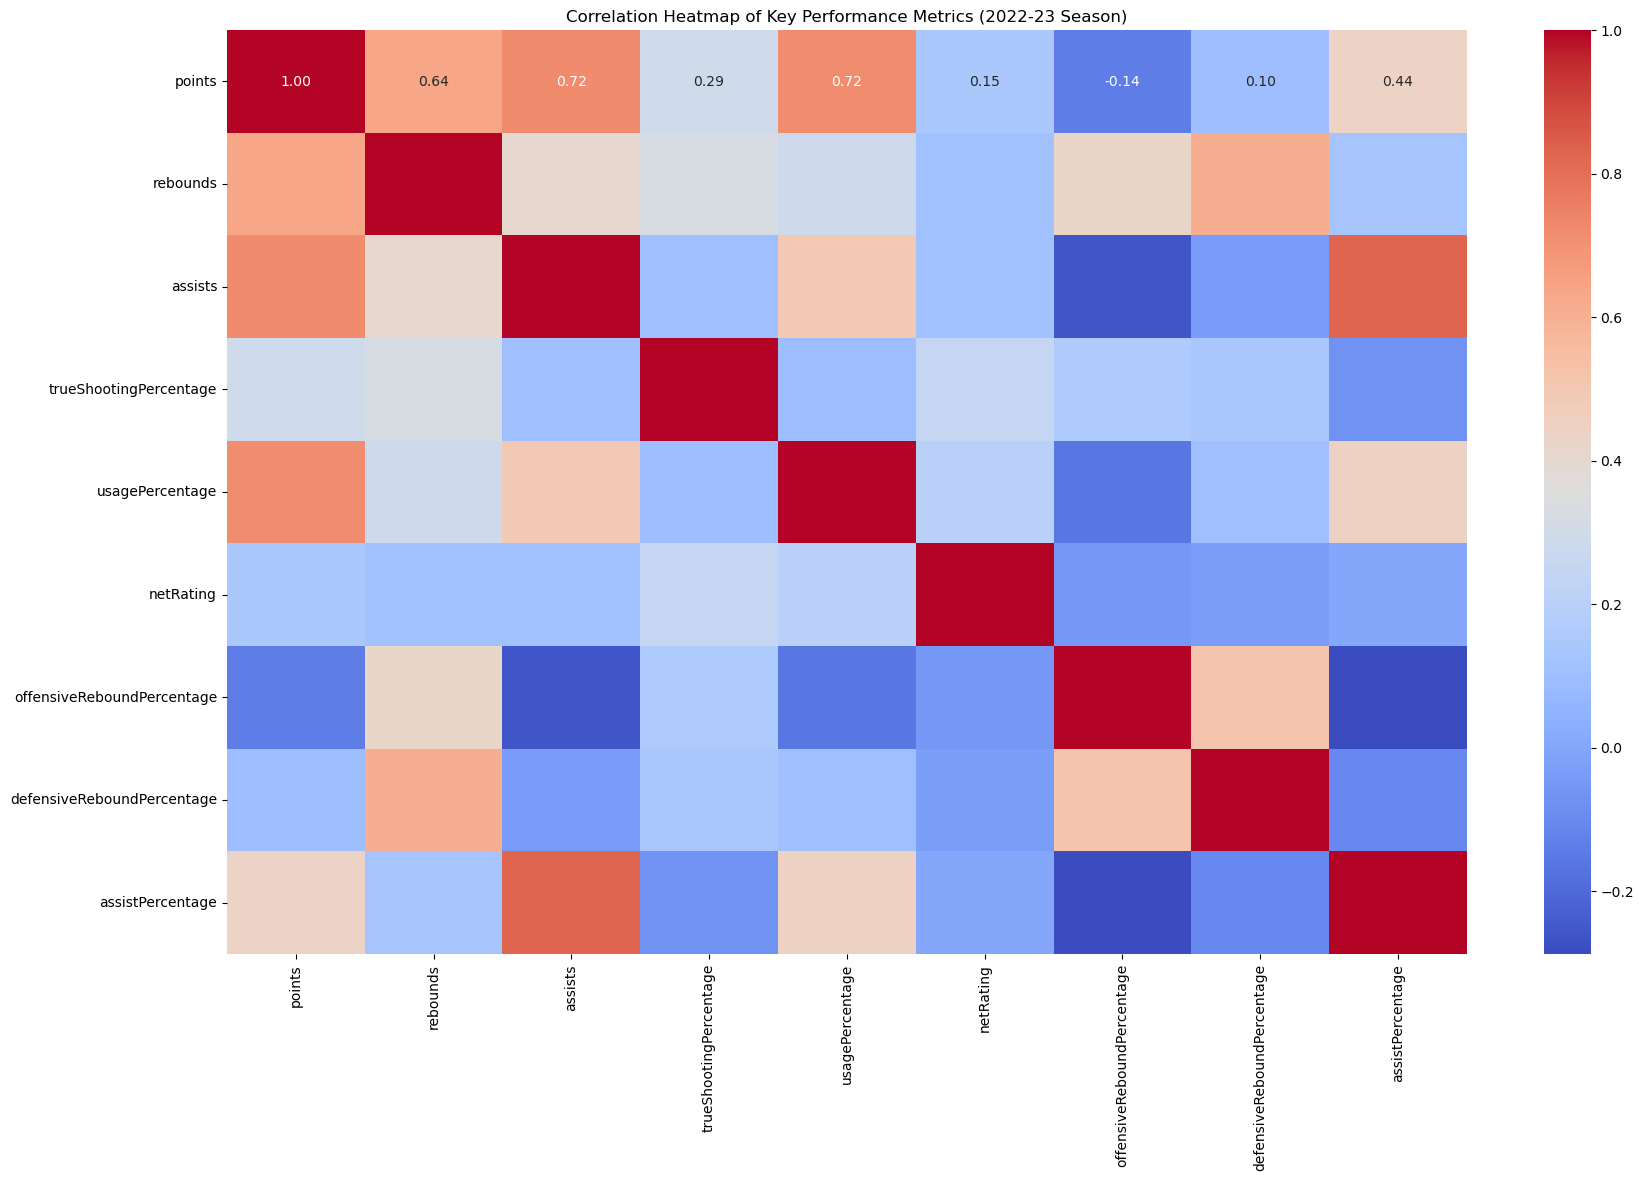

In [184]:
metrics = [
    'points', 'rebounds', 'assists', 'trueShootingPercentage', 
    'usagePercentage', 'netRating', 'offensiveReboundPercentage', 
    'defensiveReboundPercentage', 'assistPercentage'
]
metrics_data = req_season[metrics]
correlation_matrix = metrics_data.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Key Performance Metrics (2022-23 Season)')
plt.show()

In [185]:
##Interpretation:
np.fill_diagonal(correlation_matrix.values, np.nan)
strongly_correlated_pair = [correlation_matrix.stack().idxmax()]
correlation_coefficient = correlation_matrix.stack().max()
correlation_coefficient = round(correlation_coefficient, 2)
print(correlation_coefficient)

0.83


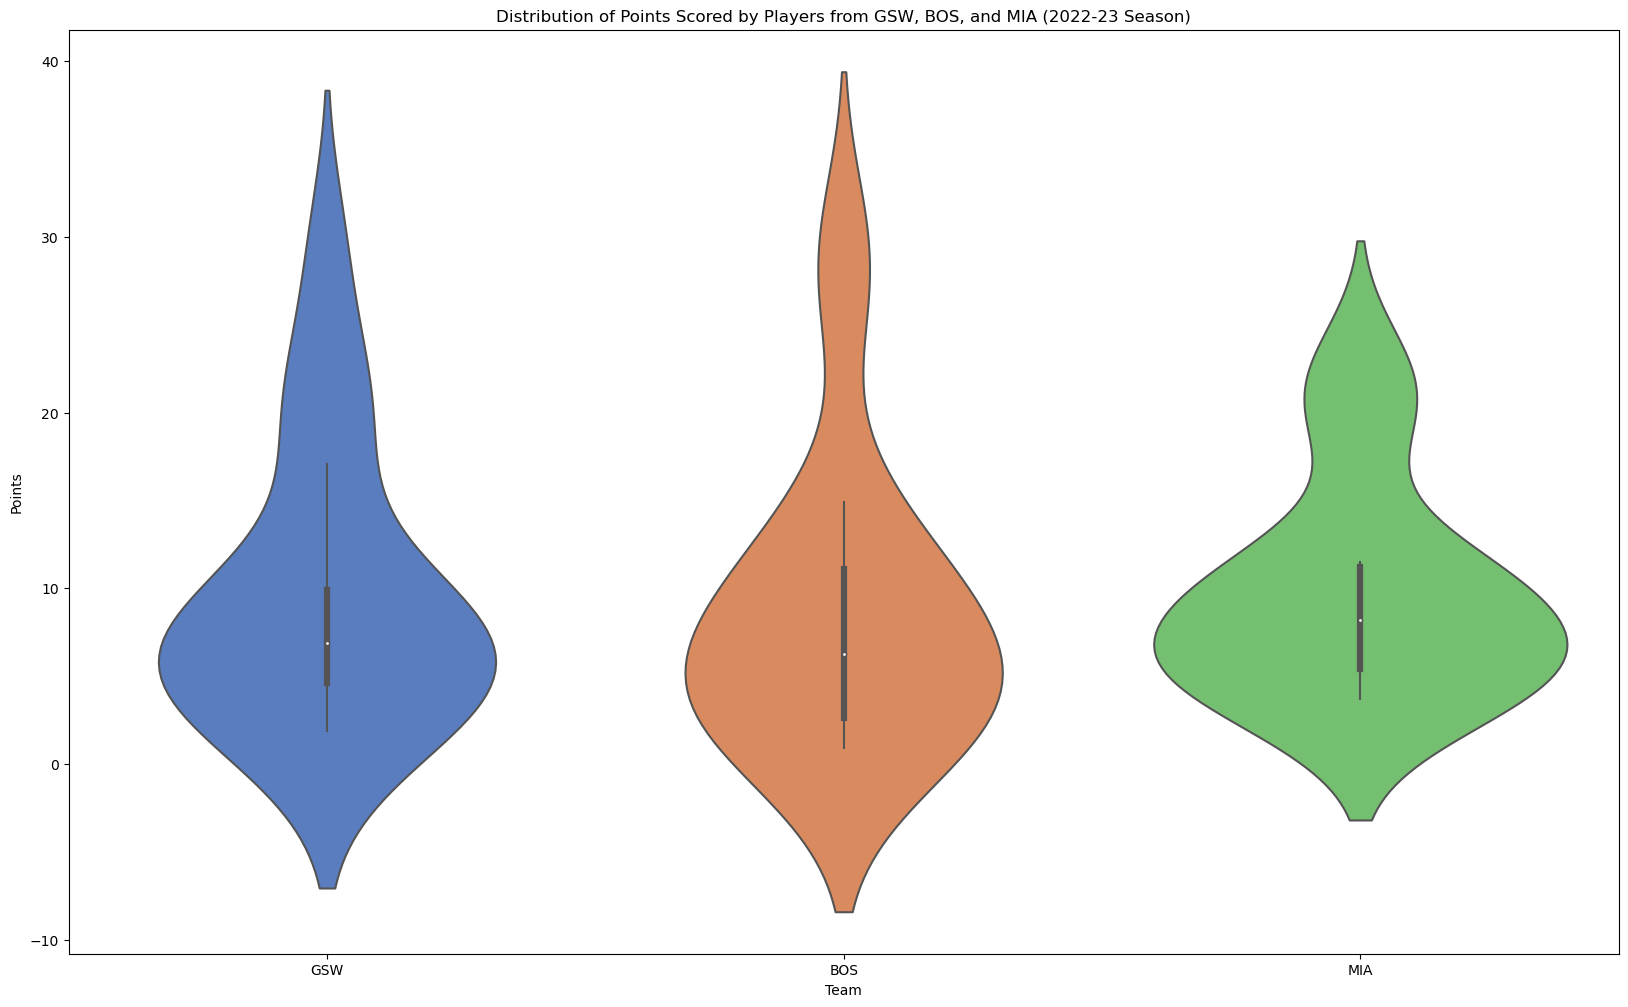

In [187]:
teams_data = req_season[req_season['teamAbbreviation'].isin(['GSW','BOS','MIA'])]

plt.figure(figsize=(20, 12))
sns.violinplot(x='teamAbbreviation', y='points', data=teams_data, palette='muted')
plt.title('Distribution of Points Scored by Players from GSW, BOS, and MIA (2022-23 Season)')
plt.xlabel('Team')
plt.ylabel('Points')
plt.show()

BOS has the widest range of points scored, which indicates greater variability in the performance of players in this team compared to the other two. GSW and MIA both have narrower distributions compared to BOS. BOS’s wider shape shows higher variability, as players’ scores fluctuate significantly. GSW’s distribution is somewhat balanced with a slightly heavier lower portion, whereas MIA appears to have a more consistent, but still variable distribution. The median score is highest for BOS. Both GSW and MIA have similar medians, though MIA appears slightly lower. None of the teams show extreme outliers outside of the main distribution, though BOS does display the most extended tail, especially at the high end of the range.

Thus our overall trends are: BOS has a higher median and more variability, indicating that its players tend to score higher but with more inconsistency and GSW and MIA have more compact distributions, with GSW being slightly wider than MIA, implying more consistent performance but with fewer extreme scores compared to BOS.

In [188]:
def identify_outliers(df, team):
    team_data = df[df['teamAbbreviation'] == team]
    Q1 = team_data['points'].quantile(0.25)
    Q3 = team_data['points'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = team_data[(team_data['points'] < lower_bound) | (team_data['points'] > upper_bound)]
    return outliers['playerName'].to_list()



BOS_outliers = identify_outliers(teams_data, 'BOS')
GSW_outliers = identify_outliers(teams_data, 'GSW')
MIA_outliers = identify_outliers(teams_data, 'MIA')

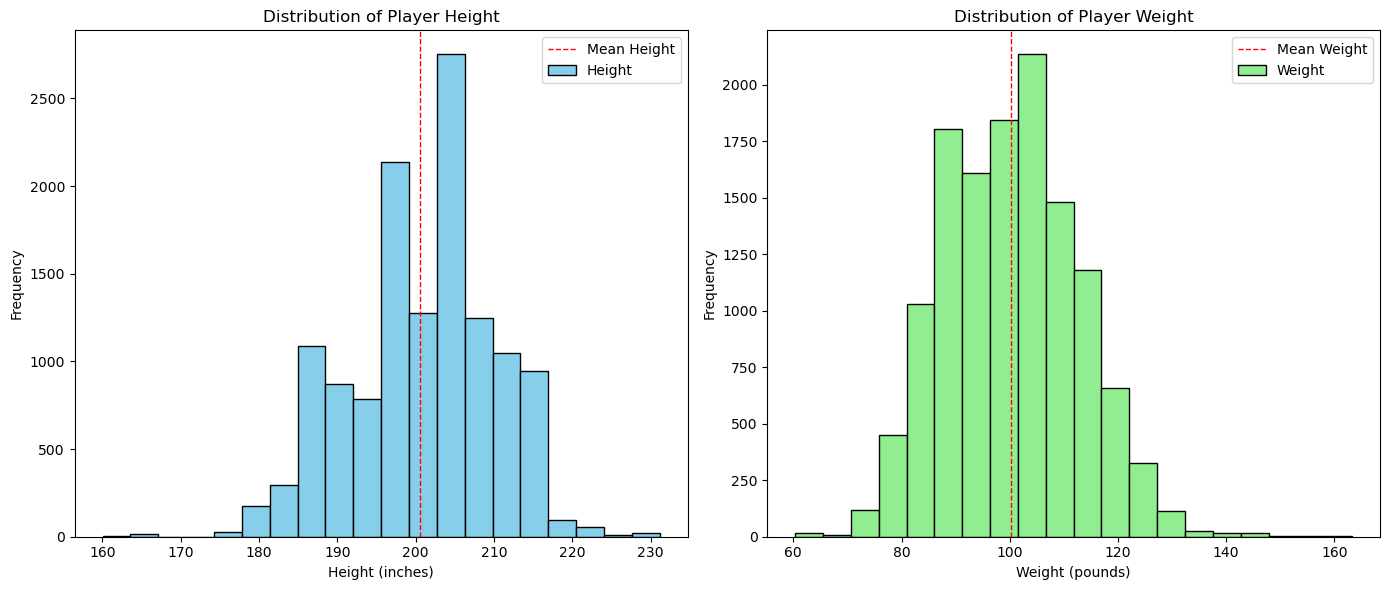

In [190]:
height = nba_data['playerHeight']
weight = nba_data['playerWeight']

mean_height = height.mean()
mean_weight = weight.mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(height, bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_height, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Player Height')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.legend(['Mean Height', 'Height'])

plt.subplot(1, 2, 2)
plt.hist(weight, bins=20, color='lightgreen', edgecolor='black')
plt.axvline(mean_weight, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Player Weight')
plt.xlabel('Weight (pounds)')
plt.ylabel('Frequency')
plt.legend(['Mean Weight', 'Weight'])

plt.tight_layout()
plt.show()

The height distribution is fairly uniform, meaning the majority of players are clustered around the mean height. The mean height falls around 200 inches. Most players fall between 190 and 210 inches, with a noticable drop in frequency of players shorter than 180 inches or taller than 215 inches.

The weight distribution is right-skewed. The mean weight is around 100 pounds, but the bulk of players are in the 80–120 pound range, with a few outliers weighing more than 120 pounds.

Thus we can say that there is a correlation between taller players and higher weights, as seen from the right-skewness. Both distributions show a standard bell-shaped curve with the majority of players close to the mean (however the weight distribution is slightly sweked due to some heavy players). We can see that most players fall within relatively predictable ranges for both height and weight.


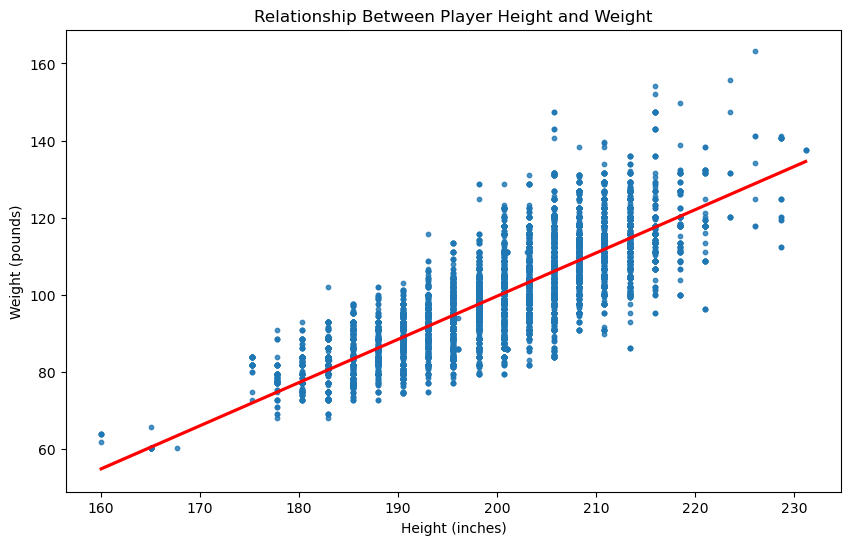

In [191]:
plt.figure(figsize=(10, 6))
sns.regplot(x=height, y=weight, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Relationship Between Player Height and Weight')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.show()

There is a positive linear relationship between player height and weight because the red regression line shows that, in general, taller players tend to weigh more. As height increases, weight also increases. All the points are fairly clustered around the regression line which means that there is a moderate to strong positive correlation between height and weight. For lower heights, there is less variability in weight, but at higher heights, there is greater spread. In general we can say that taller players are generally heavier, but the variability of their weights increases with height.


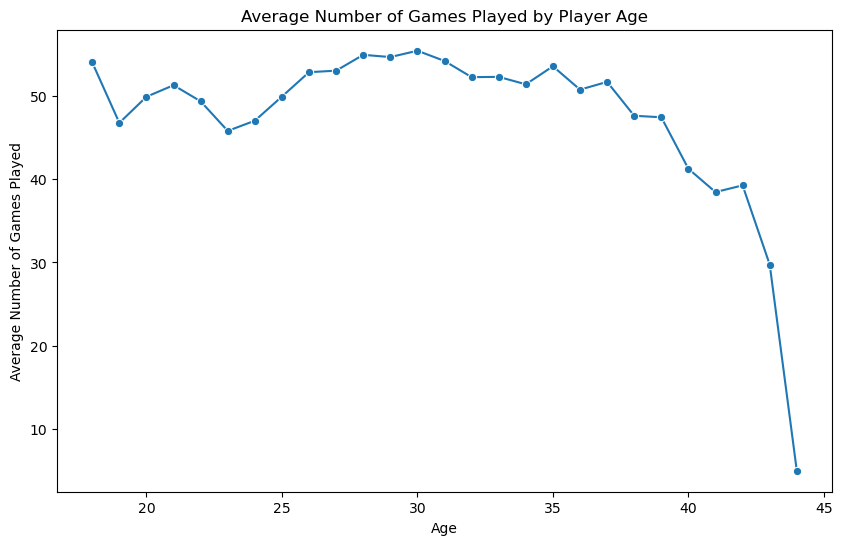

In [192]:
age_gp_avg = nba_data.groupby('age')['gamesPlayed'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='gamesPlayed', data=age_gp_avg, marker='o')
plt.title('Average Number of Games Played by Player Age')
plt.xlabel('Age')
plt.ylabel('Average Number of Games Played')
plt.show()


We can see that there is a high number of average games played for very young players (Age < 20). This average number starts to then decrease as age starts to increase but then it increases again after the age of 25. It then stays relatively consisten until the age of 35 when the average number of games played starts to decrease very fast and after the age of 40 there is a very steep decline in the average number of games played with the oldest players playing the least amount of games. Thus we can see from this graph that most players peak in the number of games they play between the ages of around 23-35 with there being a high number of very young players (Age < 20) playing a lot of games (this is probably due to a lot of younger players being drafted at an early age).

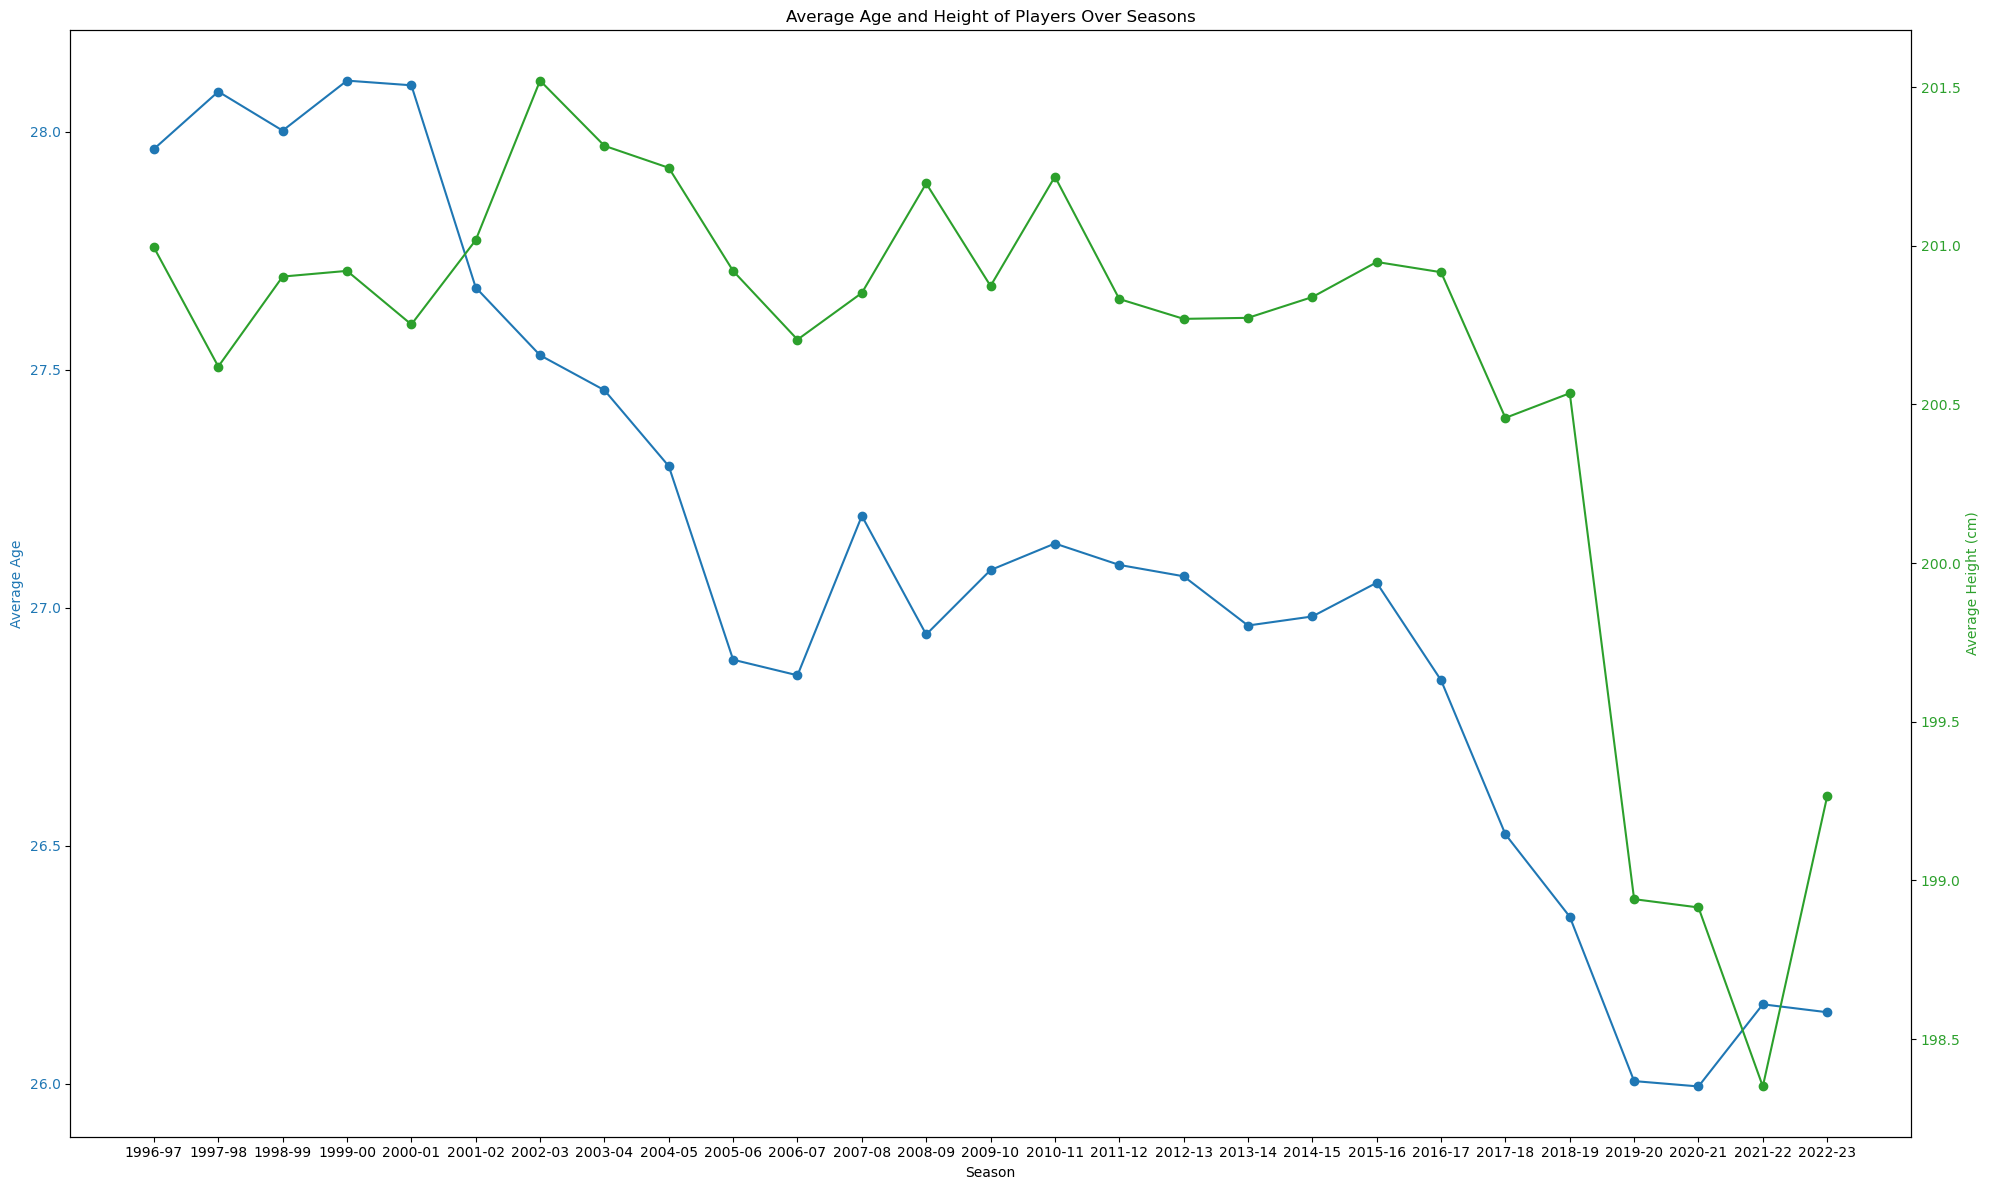

In [193]:
season_avg = nba_data.groupby('season').agg({'age': 'mean', 'playerHeight': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(20, 12))
ax1.set_xlabel('Season')
ax1.set_ylabel('Average Age', color='tab:blue')
ax1.plot(season_avg['season'], season_avg['age'], color='tab:blue', marker='o', label='Average Age')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Height (cm)', color='tab:green')
ax2.plot(season_avg['season'], season_avg['playerHeight'], color='tab:green', marker='o', label='Average Height')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Average Age and Height of Players Over Seasons')

fig.tight_layout()
plt.show()

 We can see that that over the seasons the average player age is decreasing. There is a pretty consistent decrease in average age over the seasons with noticable dips after the mid-2000s and mid-2010s and so fair it seems steady at around 26 per the last season. The average height remained more or less the same with some fluctuations until the 2015-16 season where there is then multiple sharp dips in their average heights as the seasons went on however per the last season the average height did increase to close to 199.5 cm.

This shows us that over the seasons, more and more younger players have been recruited into the NBA. And the age at which they've been recruited has probably also decreased over the years. Their average height has also decreased which again means that more and more shorter players have started to be recruited over the past 10ish years. Thus overall the players of a team today are on average shorter and younger than the players of teams two decades ago.

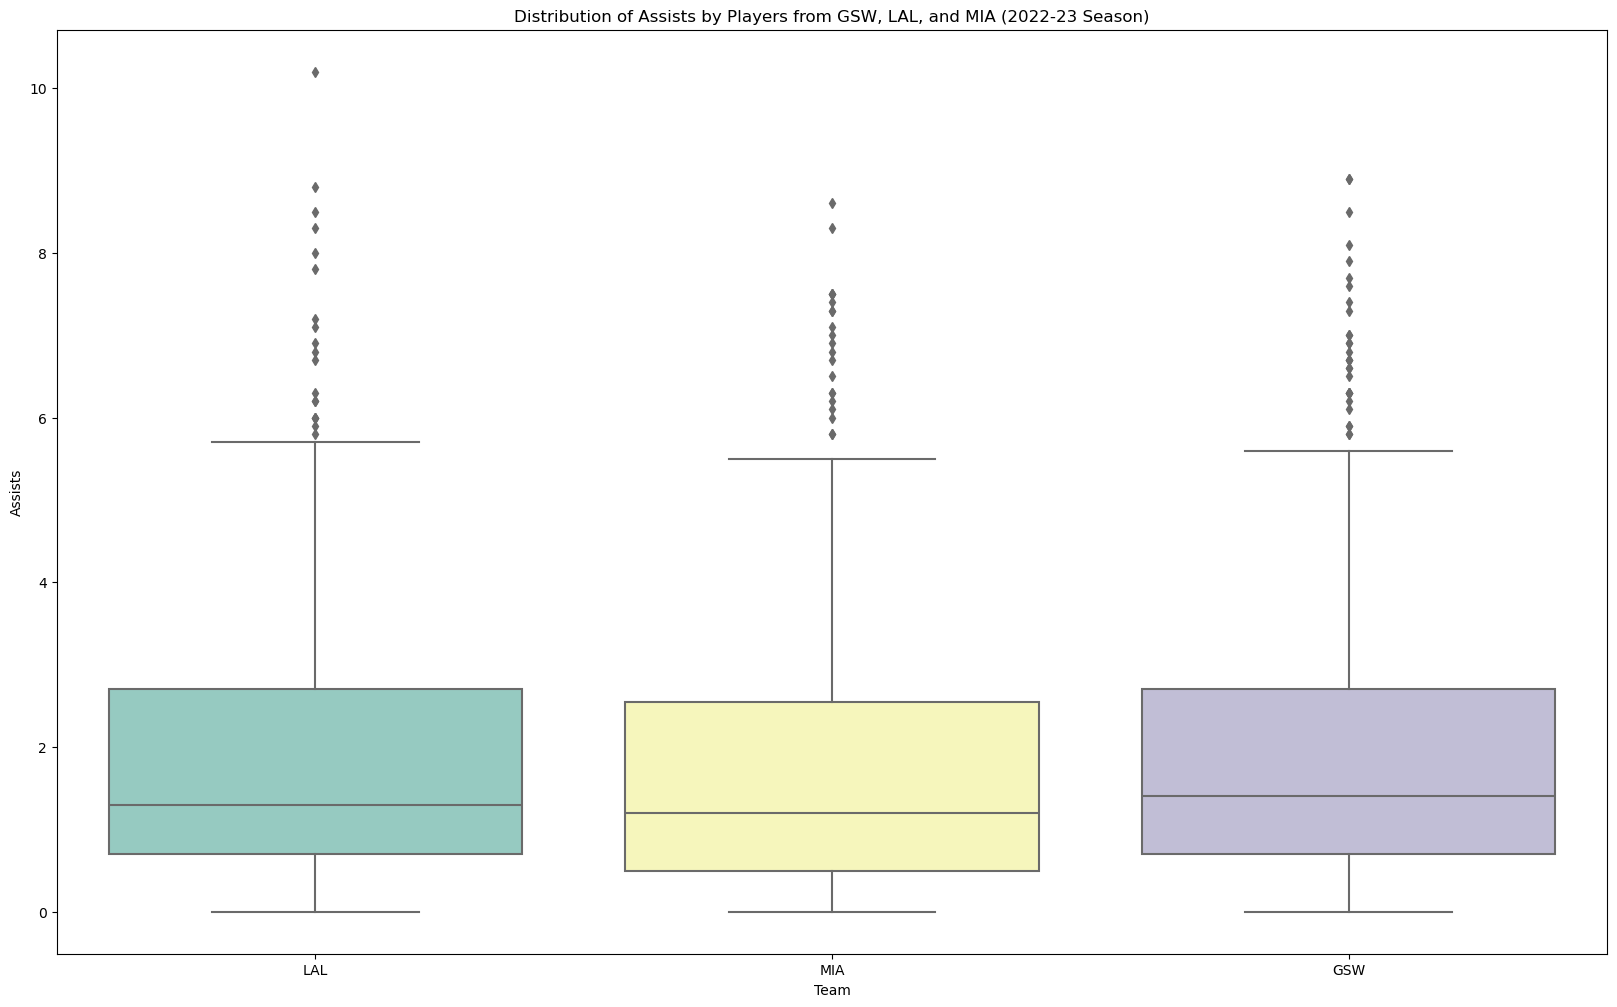

In [194]:
teams = ['GSW', 'LAL', 'MIA'] 
teams_data = nba_data[nba_data['teamAbbreviation'].isin(teams)]

plt.figure(figsize=(20, 12))
sns.boxplot(x='teamAbbreviation', y='assists', data=teams_data, palette='Set3')
plt.title('Distribution of Assists by Players from GSW, LAL, and MIA (2022-23 Season)')
plt.xlabel('Team')
plt.ylabel('Assists')
plt.show()

1. GSW has the highest median assists made by its players.
        2. There are outliers in all the distributions. These outliers likely indicate that a few Lakers players made significantly more assists than the majority of their teammates. This could be due to a variety of factors, such as the player's role on the team, playing style, or individual skill level.
        3. The box widths of all the distributions is more or less the same which means that all 3 teams had a similar range of assists made. LAL also has the furthest outliers which indicates that there were some players that were performing much better in comparison to the rest of the team compared to the other teams. MLA also has the lowest median of asissts made thus indicating that their players make less assists as compared to the players of the other teams.